# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score

In [ ]:
# 데이터 로드
california = fetch_california_housing()
#california_df = pd.DataFrame(california.data, columns=california.feature_names)
#california_df['target'] = california.target
#california_df.head()
x_data = california.data
y_data = california.target
# 데이터 분할

# 모델 학습

# 예측

# 평가

In [ ]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
X = fetch_california_housing(as_frame = True)['data']
y = fetch_california_housing(as_frame = True)['target']
# as_frame = True : 데이터프레임 형식으로 바꾸어주는 코드(디폴트값 : False)
data = pd.concat([X, y], axis = 1)

display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

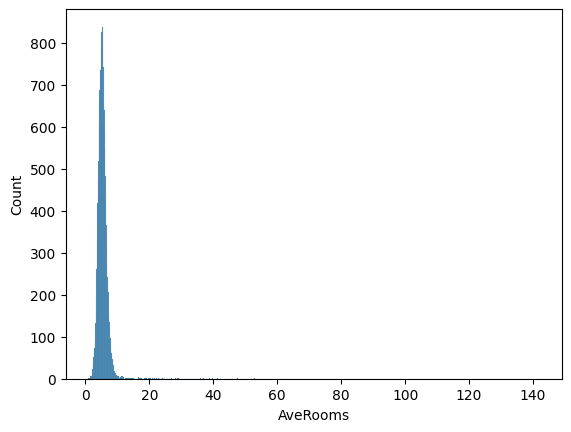

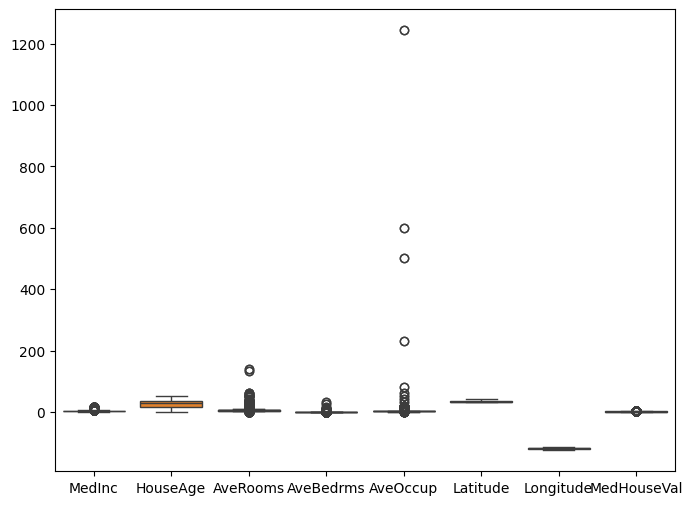

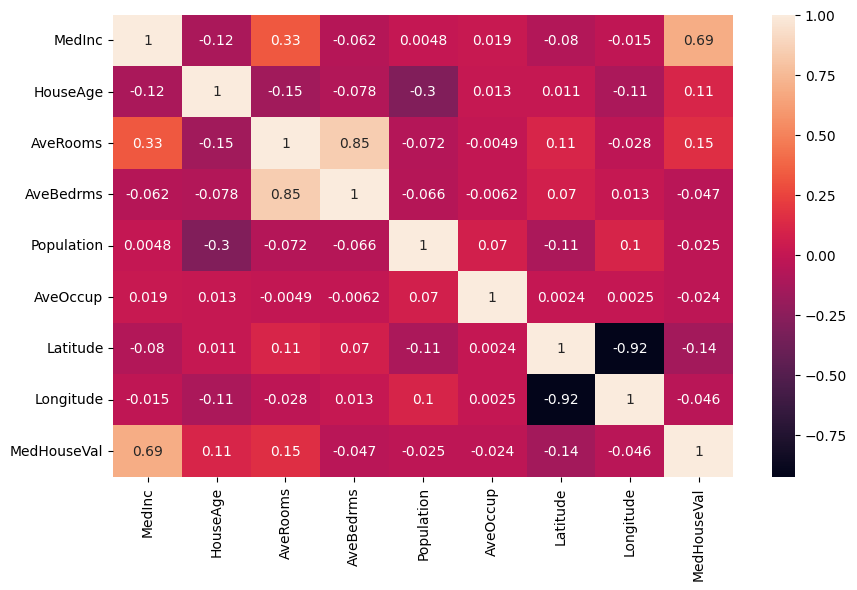

In [ ]:
sns.histplot(data = data, x = "AveRooms")
plt.figure(figsize = (8, 6))
sns.boxplot(data = data.loc[:, ["MedInc", "HouseAge", "AveRooms", "AveBedrms",
							"AveOccup", "Latitude", "Longitude", "MedHouseVal"]])
sns.boxplot(data = data.loc[:, ["AveRooms", "AveBedrms", "AveOccup"]])
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.loc[data.AveRooms > 100, :] #1914, 1979 row 제거
data.loc[data.AveOccup>200, :] # 3364, 13034, 16669, 19006 row 제거
# AveBedrms, Longitude column 제거 -> 다중공선성 제거

data = data.drop(index = [1914, 1979, 3364, 13034, 16669, 19006]) ##remove outlier
data = data.drop(columns = ['AveBedrms', 'Longitude'])  ## remove collinearity(다중공선성)

MedHouseVal
5.00001    964
1.37500    121
1.62500    116
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64

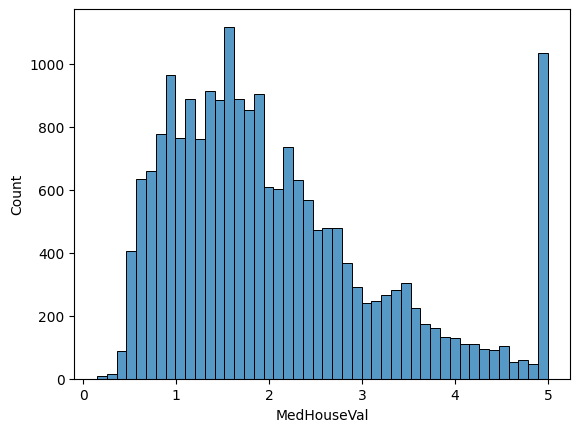

In [ ]:
# 시각화
sns.histplot(data=data, x = "MedHouseVal")
data.MedHouseVal.value_counts()

In [ ]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=0xC0FFEE)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0xC0FFEE)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test_transformed = scaler.transform(X_test)

In [ ]:
# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측
y_pred = lin_reg.predict(X_test)

print(y_pred)

[2.00161825 2.52539651 1.89650201 ... 2.68585013 2.00824139 0.50318062]


In [ ]:
# 평가
mse = mean_squared_error(y_test, y_pred)    # 평균제곱오차
r2 = r2_score(y_test, y_pred)               # 결정계수

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5172284774045749
R^2 Score: 0.6118529045448353


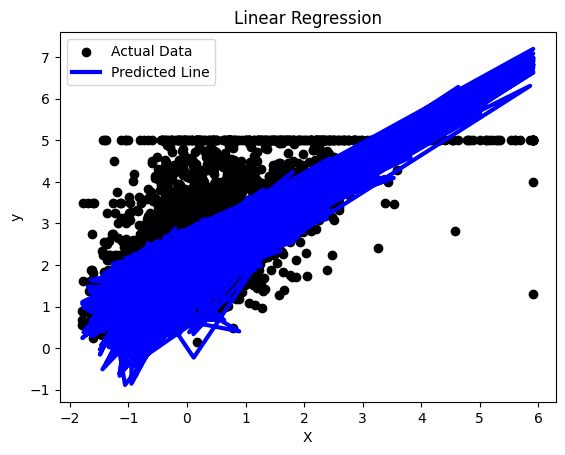

In [ ]:
# 시각화
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual Data') # Select the first feature from X_test
plt.plot(X_test_transformed[:, 0], y_pred, color='blue', linewidth=3, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target
print(wine.DESCR)

# 데이터 분할

# 모델 학습


# 예측

# 평가


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
print(X.shape) #(1599, 11)
print(y.shape)

(178, 13)
(178,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
# 모델 학습
nb = GaussianNB()
nb.fit(x_train, y_train)

# 예측
y_predict = nb.predict(x_test)

#평가
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

print(accuracy)
print(conf_matrix) #1.0


0.9661016949152542
[[14  0  0]
 [ 1 23  1]
 [ 0  0 20]]


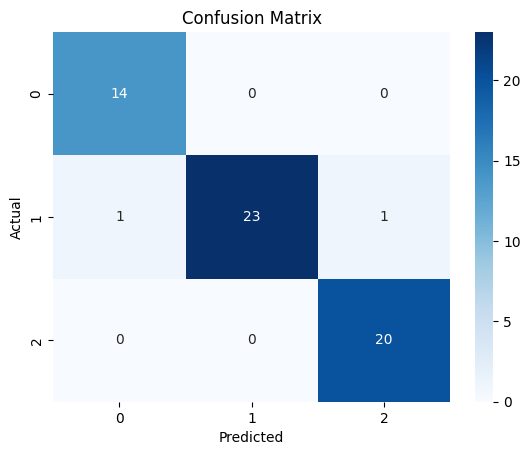

In [ ]:
# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(f"X: {X}")
print(f"y: {y}")

# 모델 생성

# 교차 검증


X: [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
y: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.

In [ ]:
# 모델 생성
nb = GaussianNB()

# 교차 검증
scores = cross_val_score(nb, X, y, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Mean CV Score: {np.mean(scores)}')

Cross-validation scores: [0.         0.         0.01136364 0.01136364 0.        ]
Mean CV Score: 0.004545454545454545


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


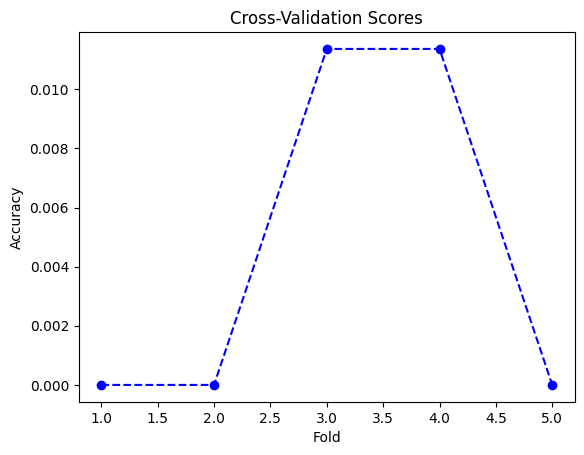

In [ ]:
# 시각화
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()